In [1]:
library(purrr)
library(dplyr)
library(corrplot)
library(hablar)
library(corrplot)
library(RColorBrewer)
library(MASS)
library(stats)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

corrplot 0.84 loaded

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [2]:
train = read.csv("train.csv")
train['train_or_test'] = 'train'
test = read.csv("test.csv")
test['train_or_test'] = 'test'

In [3]:
train_target <- train[c('Id', 'SalePrice')]
train <- train[names(train) != 'SalePrice']
al <- rbind(train, test)

In [4]:
desc <- function (variable){
    if (is.numeric(al[[variable]])){
            hist(al[[variable]], xlab = "", main = paste("Histogram of ", toupper(variable)))
    }
    
    else if (is.character(al[[variable]]) | is.factor(al[[variable]])){
            barplot(prop.table(table(al[[variable]])), main = paste("Barplot of ", toupper(variable)))    
        }
    }

In [5]:
# data.frame(colSums(is.na(al)))
NAs <- al %>%
    map_df(function(x) sum(is.na(x))) %>%
    gather(feature, num_nulls)  %>% 
    mutate(Na_ratio = round(num_nulls / nrow(al), 4))
NAs <- NAs[NAs$num_nulls != 0,]          
(NAs <- NAs[order(NAs$num_nulls, decreasing = T), ])

feature,num_nulls,Na_ratio
PoolQC,2909,0.9966
MiscFeature,2814,0.9640
Alley,2721,0.9322
Fence,2348,0.8044
FireplaceQu,1420,0.4865
LotFrontage,486,0.1665
GarageYrBlt,159,0.0545
GarageFinish,159,0.0545
GarageQual,159,0.0545
GarageCond,159,0.0545


In [6]:
# in variables desription file, we see that some Na has meaning, so we replace Na's by that value
al$Alley <- ifelse(is.na(al$Alley), "No alley access", al$Alley)
al$BsmtQual <- ifelse(is.na(al$BsmtQual), "No Basement", al$BsmtQual)
al$BsmtQual <- ifelse(is.na(al$BsmtQual), "No Basement", al$BsmtQual)
al$BsmtCond <- ifelse(is.na(al$BsmtCond), "No Basement", al$BsmtCond)
al$BsmtExposure <- ifelse(is.na(al$BsmtExposure), "No Basement", al$BsmtExposure)
al$BsmtFinType1 <- ifelse(is.na(al$BsmtFinType1), "No Basement", al$BsmtFinType1)
al$BsmtFinType2 <- ifelse(is.na(al$BsmtFinType2), "No Basement", al$BsmtFinType2)
al$FireplaceQu <- ifelse(is.na(al$FireplaceQu), "No Fireplace", al$FireplaceQu)
al$GarageType <- ifelse(is.na(al$GarageType), "No Garage", al$GarageType)
al$GarageQual <- ifelse(is.na(al$GarageQual), "No Garage", al$GarageQual)
al$GarageFinish <- ifelse(is.na(al$GarageFinish), "No Garage", al$GarageFinish)
al$GarageCond <- ifelse(is.na(al$GarageCond), "No Garage", al$GarageCond)
al$PoolQC <- ifelse(is.na(al$PoolQC), "No Pool", al$PoolQC)
al$Fence <- ifelse(is.na(al$Fence), "No Fence", al$Fence)
al$MiscFeature <- ifelse(is.na(al$MiscFeature), "None", al$MiscFeature)

In [7]:
# Now we check again NA's
NAs <- al %>%
    map_df(function(x) sum(is.na(x))) %>%
    gather(feature, num_nulls)  %>% 
    mutate(Na_ratio = round(num_nulls / nrow(al), 4))
NAs <- NAs[NAs$num_nulls != 0,]          
(NAs <- NAs[order(NAs$num_nulls, decreasing = T), ])

feature,num_nulls,Na_ratio
LotFrontage,486,0.1665
GarageYrBlt,159,0.0545
MasVnrType,24,0.0082
MasVnrArea,23,0.0079
MSZoning,4,0.0014
Utilities,2,0.0007
BsmtFullBath,2,0.0007
BsmtHalfBath,2,0.0007
Functional,2,0.0007
Exterior1st,1,0.0003


In [8]:
# Let us fill NA's, in nemarice variables with mean, and in catagorical variables with most frequent
for (variable in NAs$feature){
    if (is.numeric(al[[variable]])){
        al[variable][is.na(al[variable])] <- mean(al[[variable]], na.rm = TRUE)
    }
    else if (is.character(al[[variable]]) | is.factor(al[[variable]])){
        al[is.na(al[variable]),][variable] <- names(which.max(table(al[variable])))
    }
    }
    

In [9]:
# Now finally we check NA's
sum(is.na(al))

[1] 0

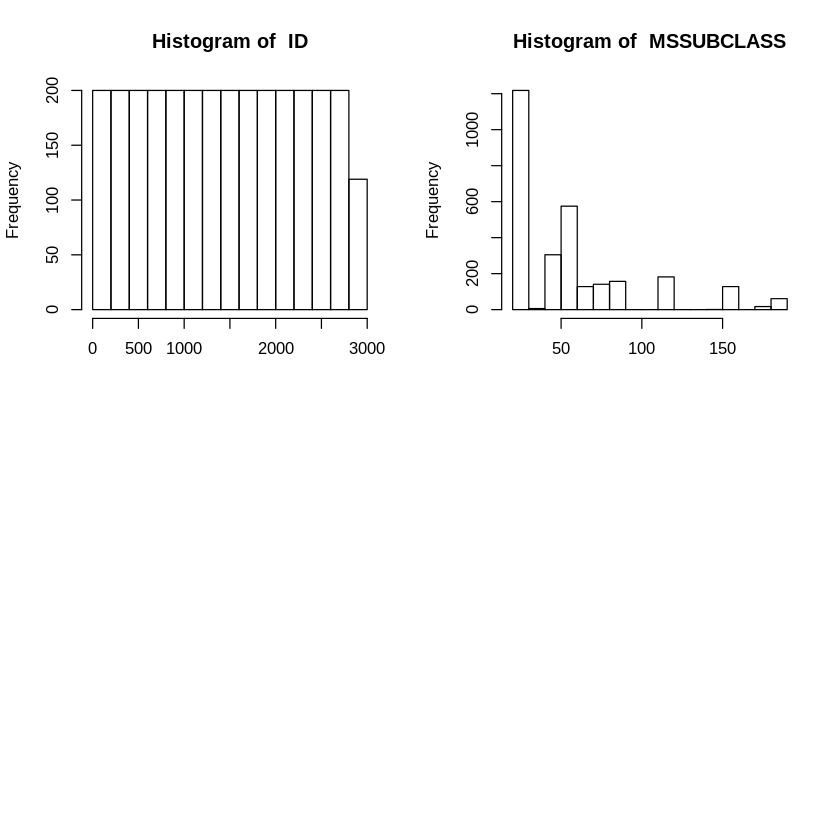

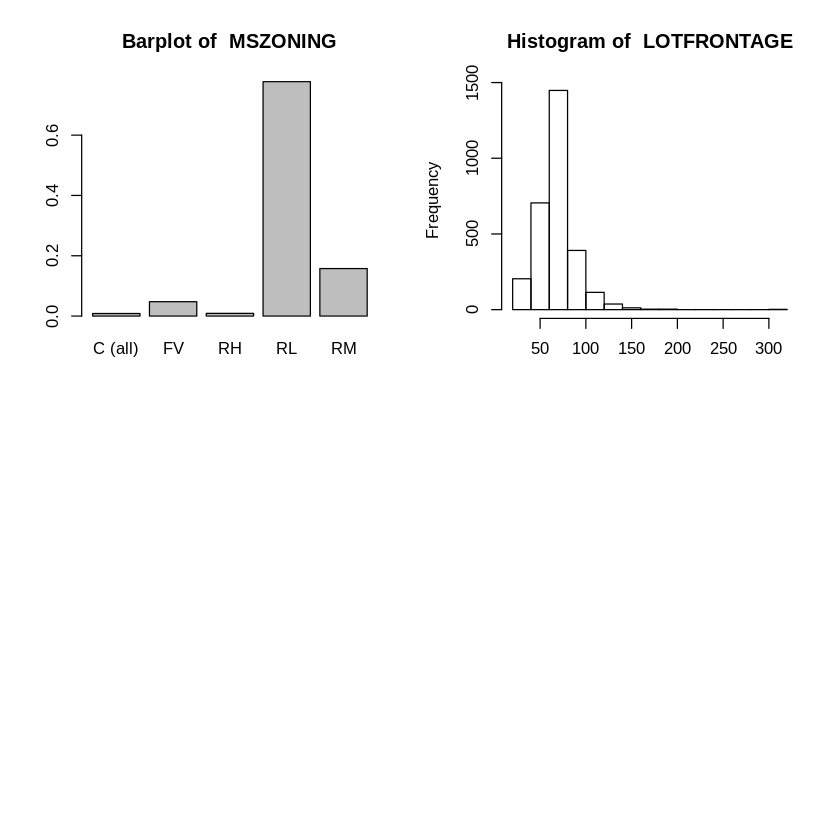

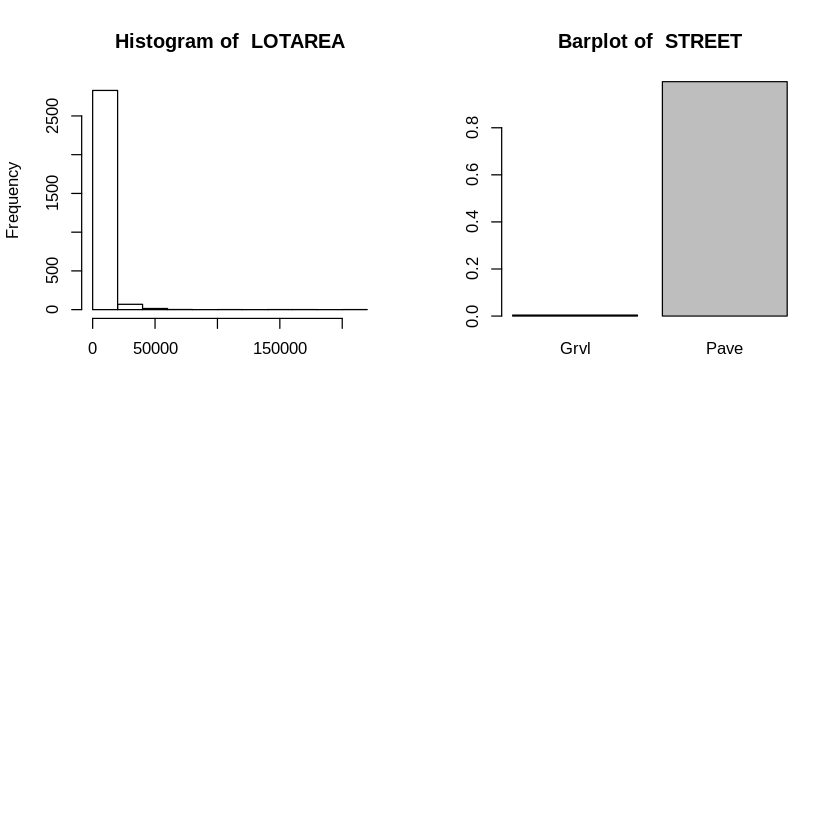

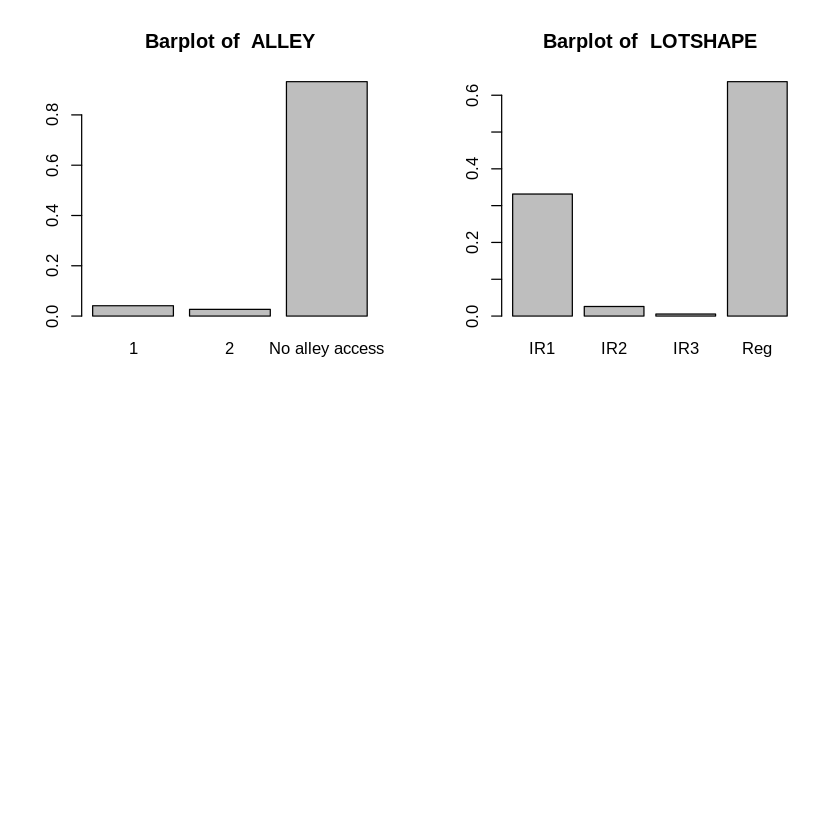

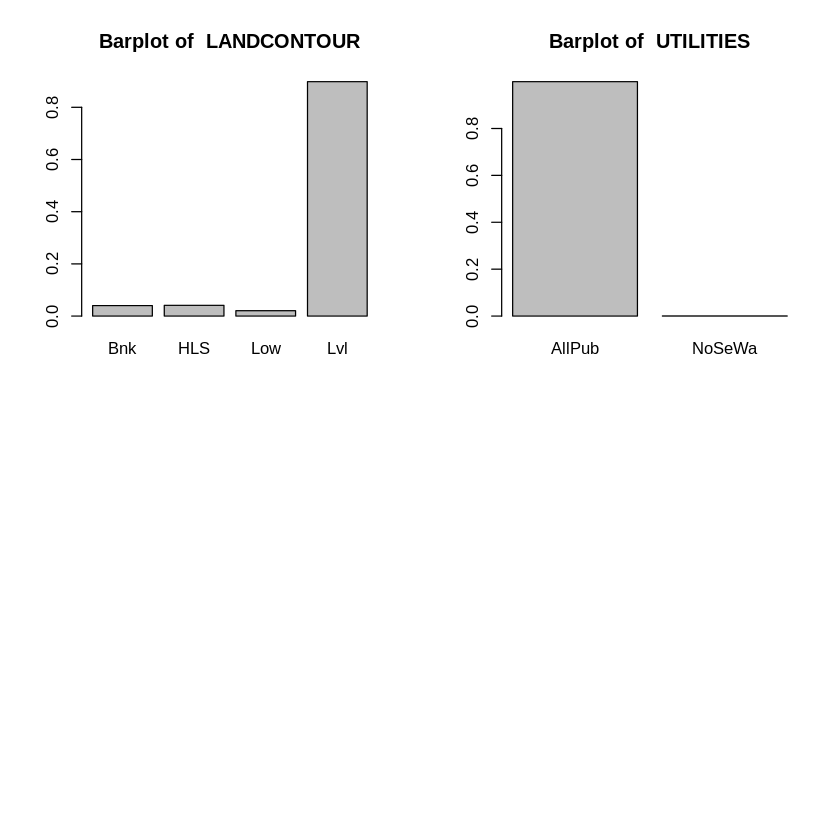

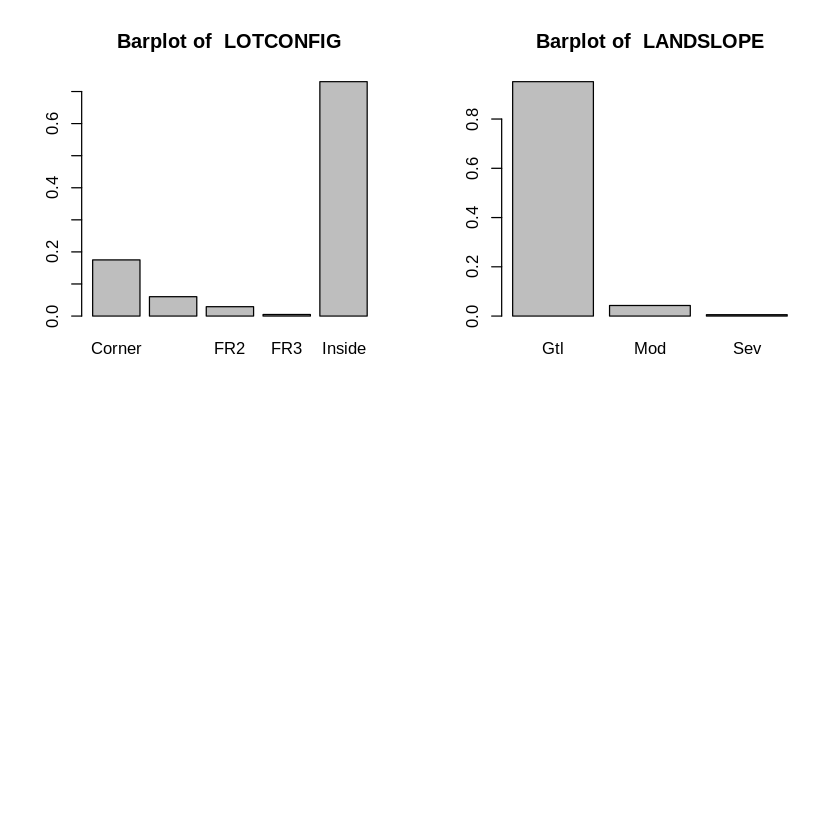

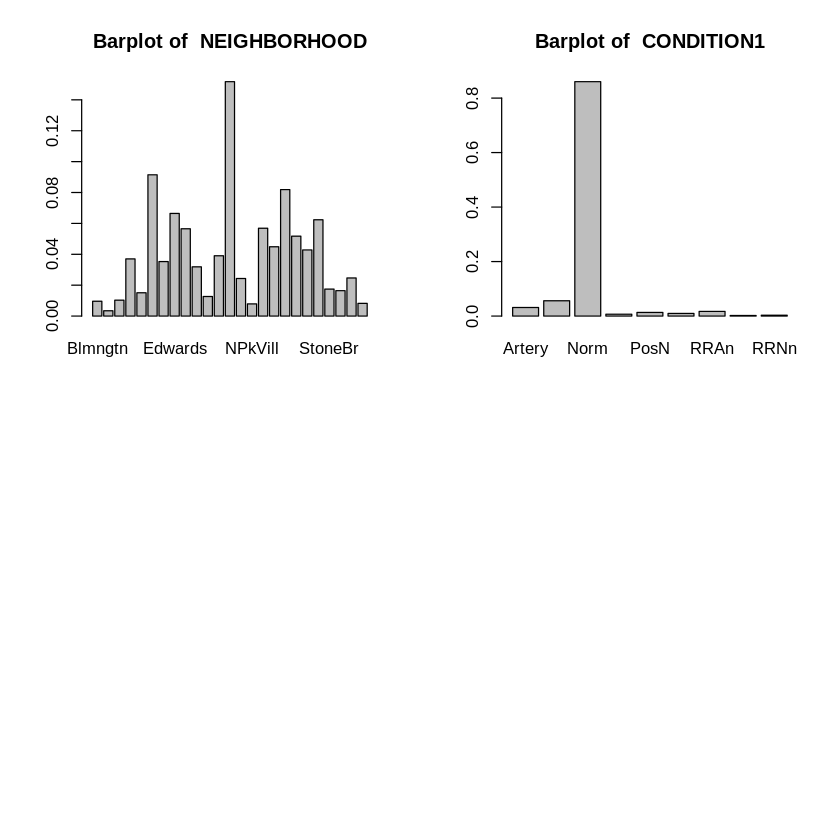

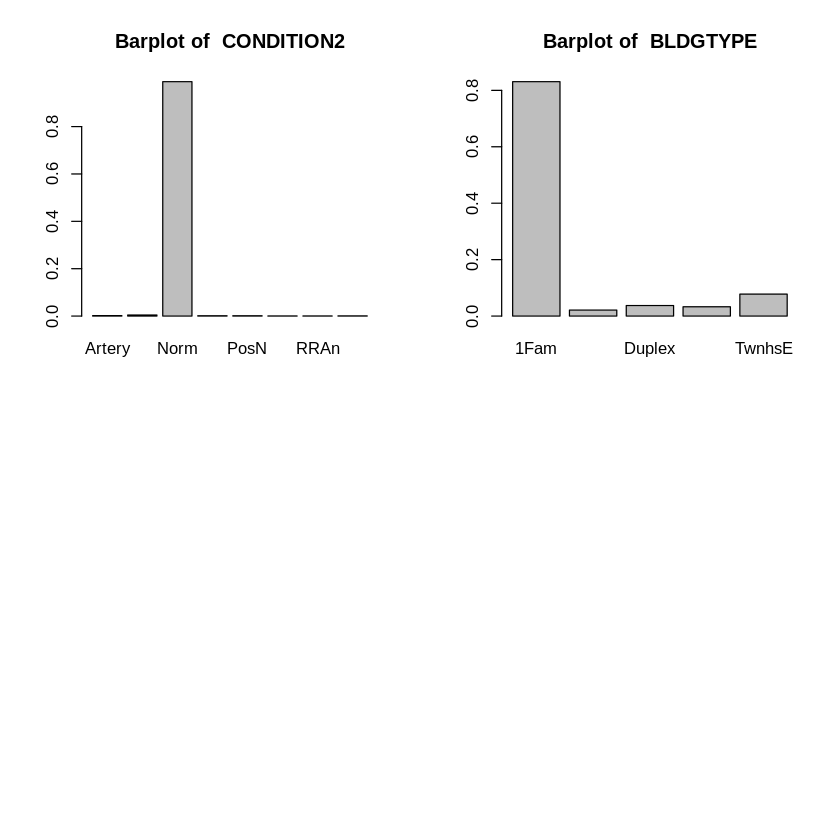

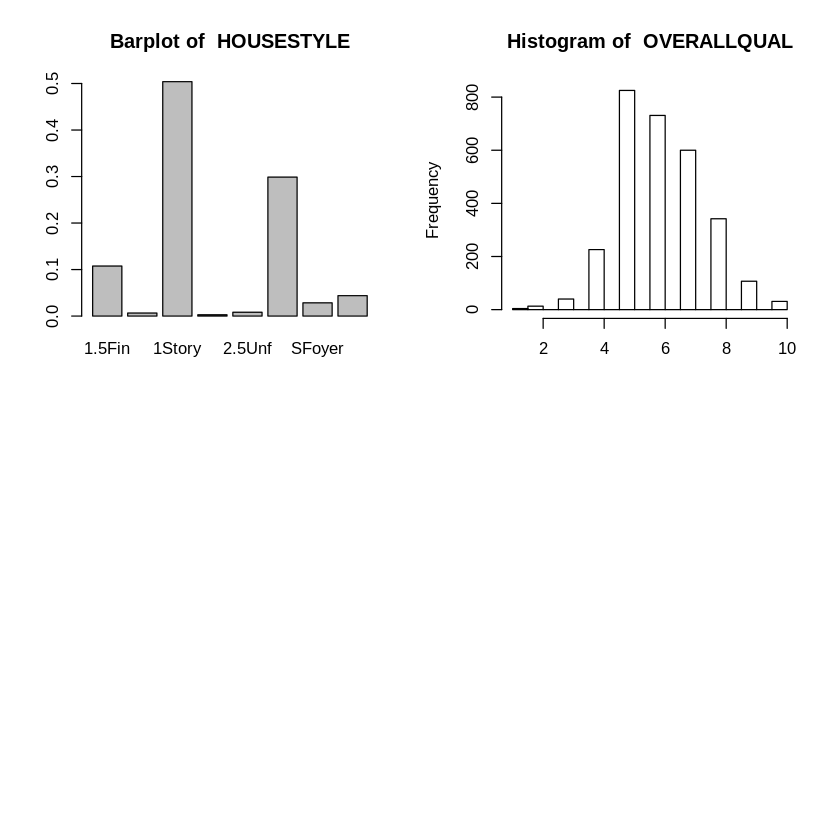

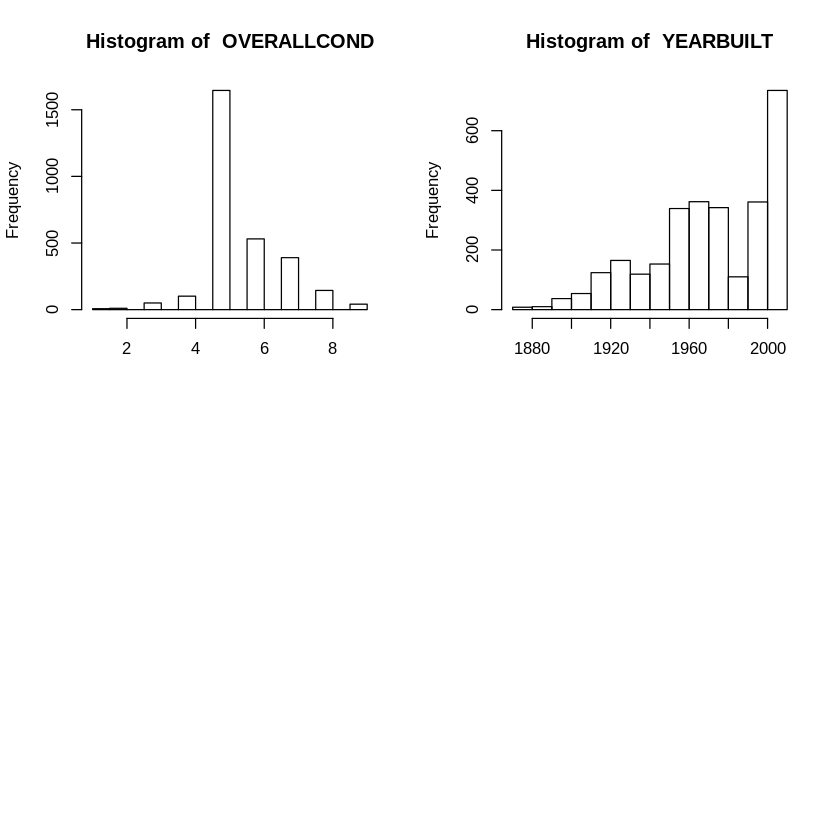

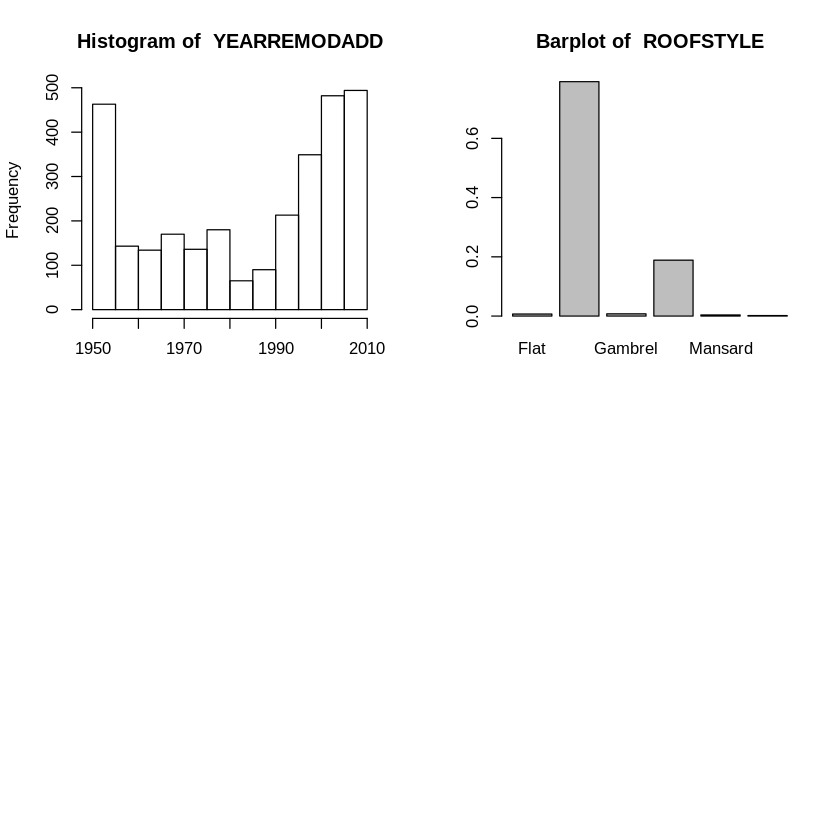

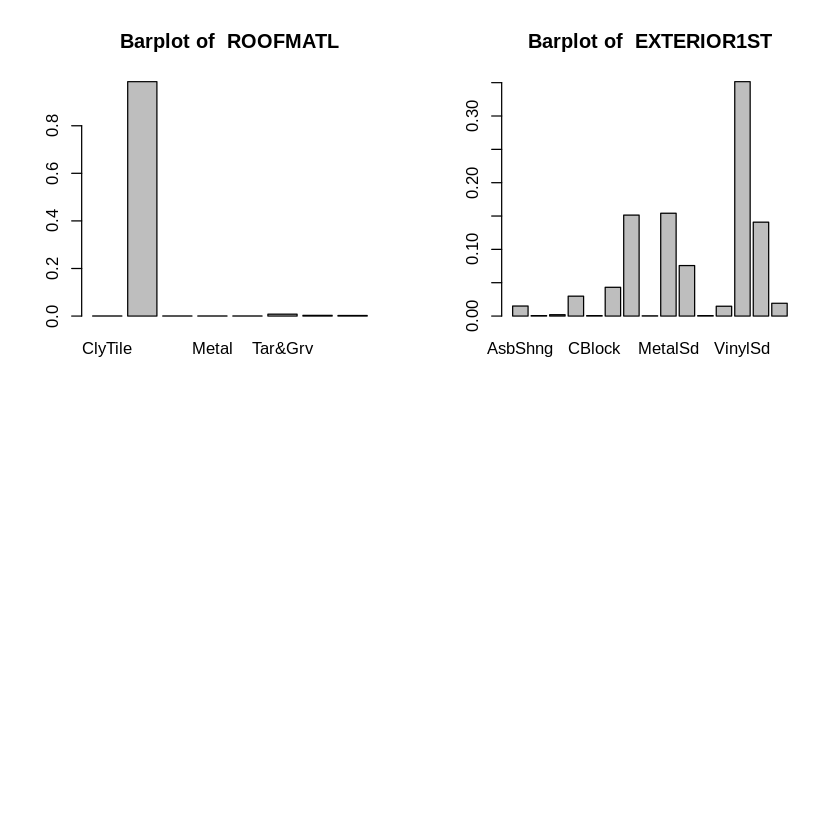

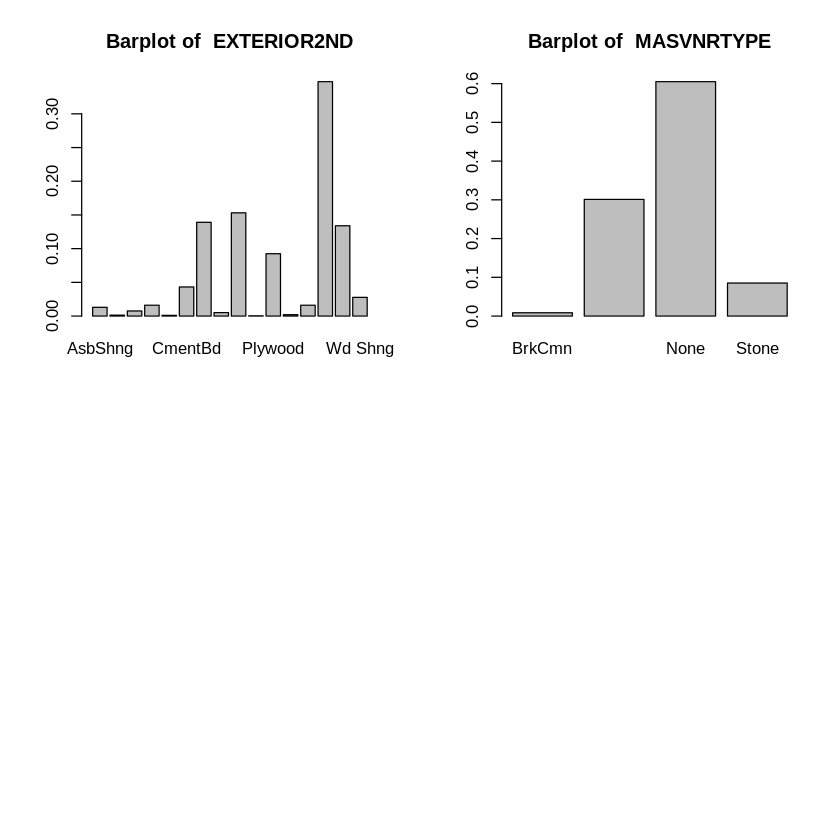

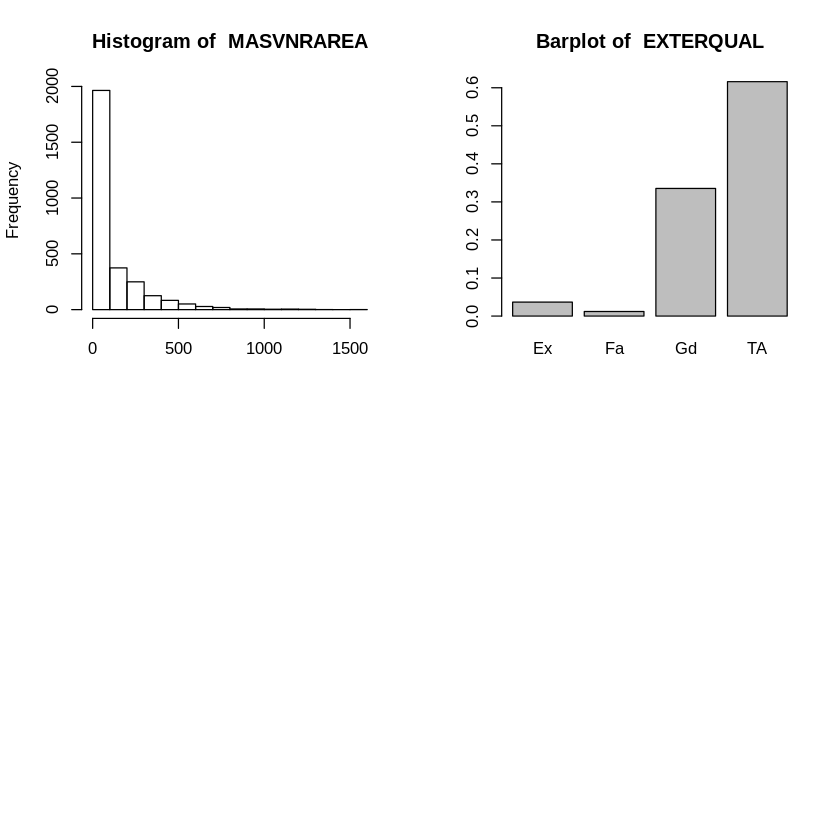

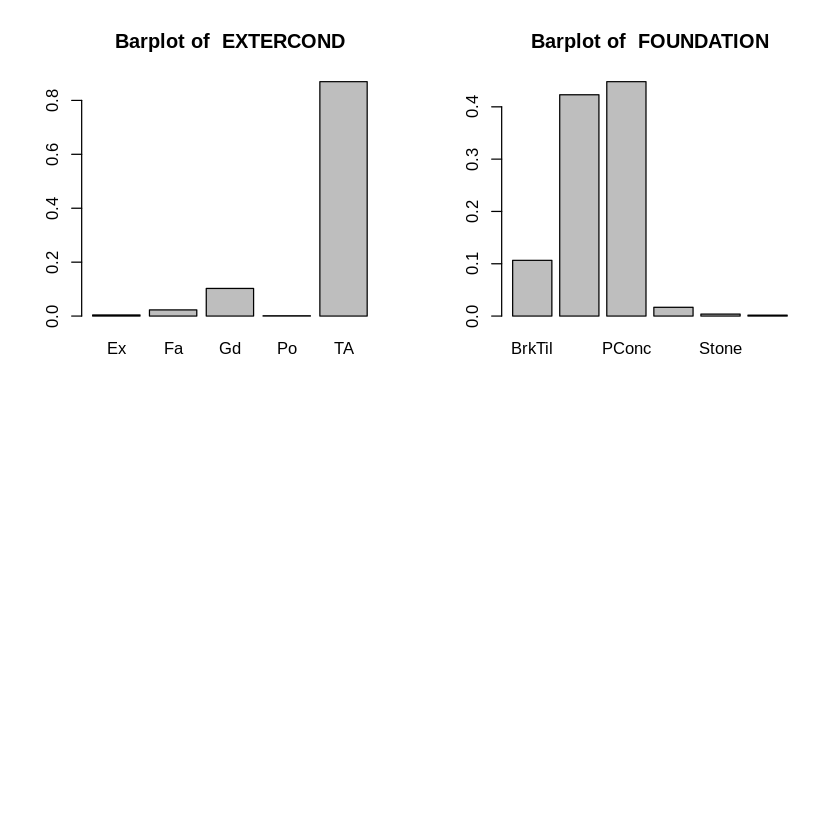

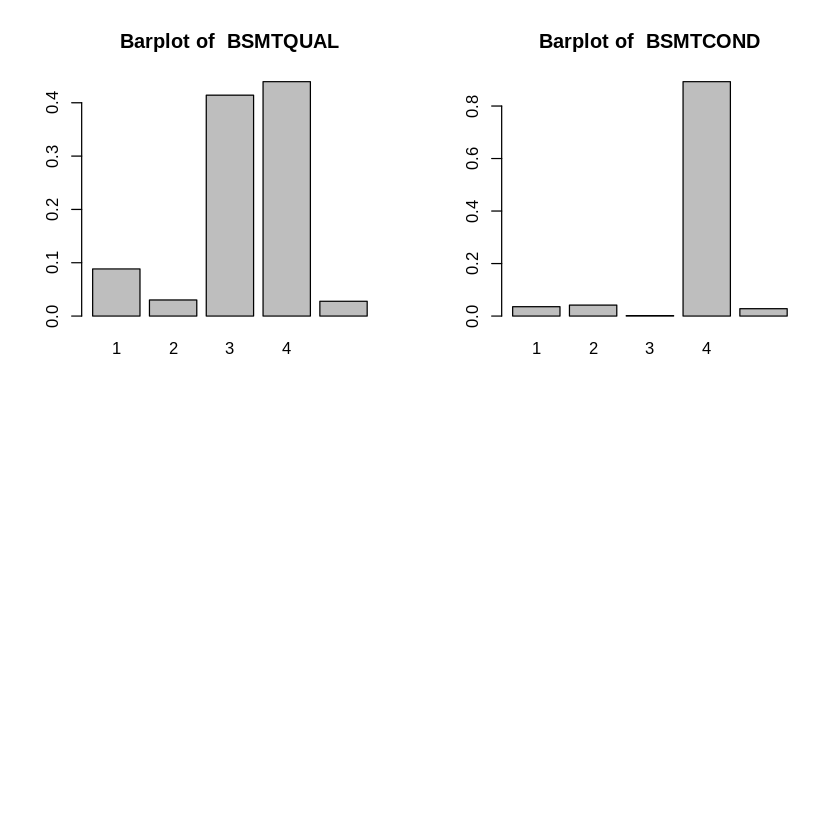

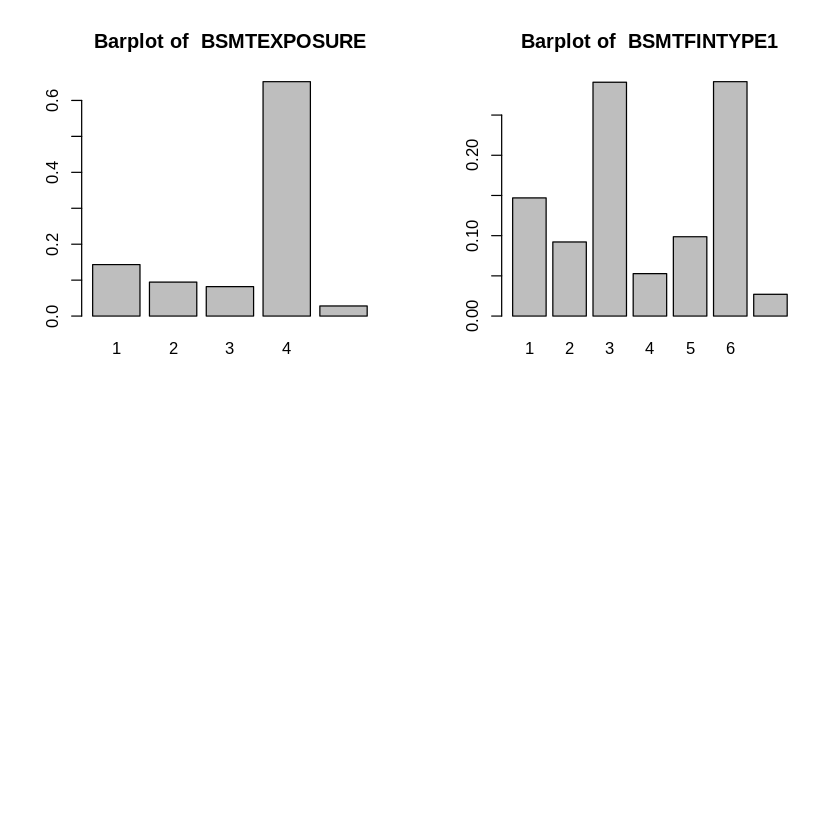

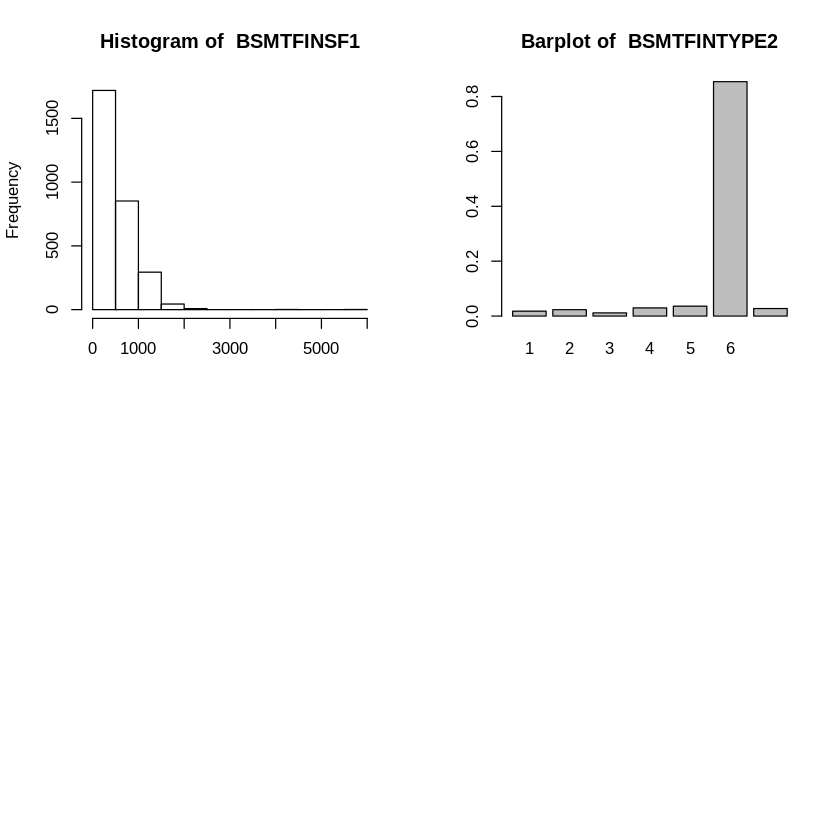

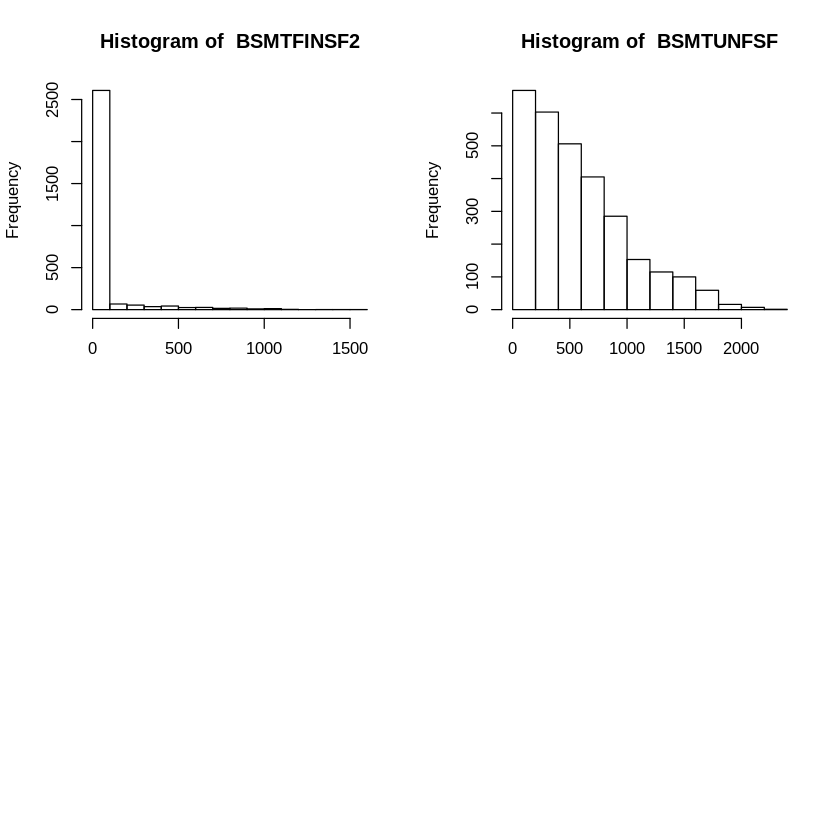

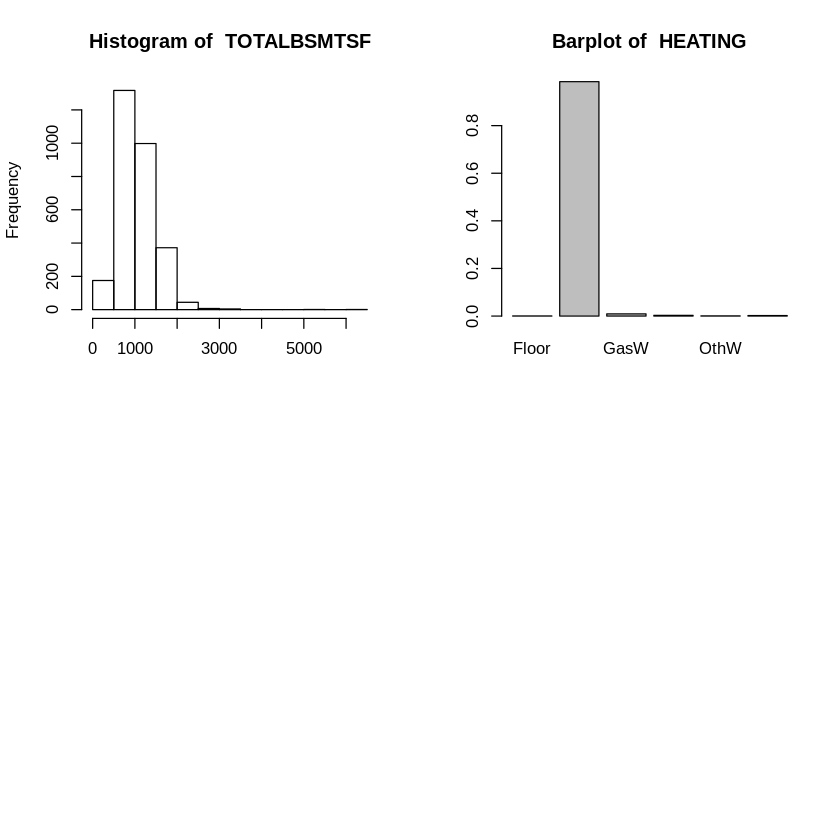

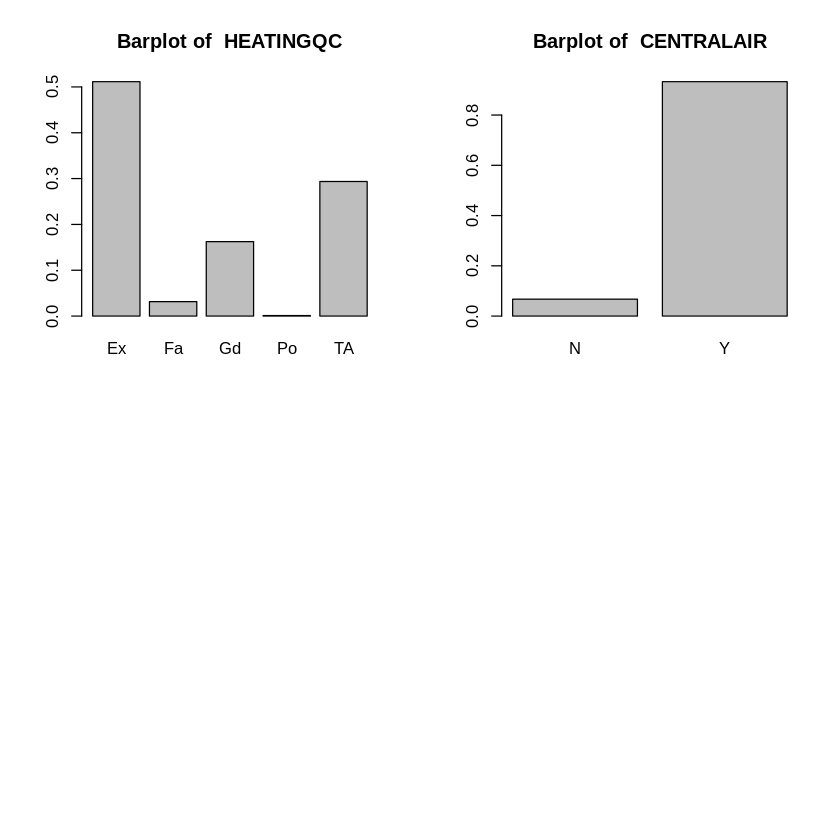

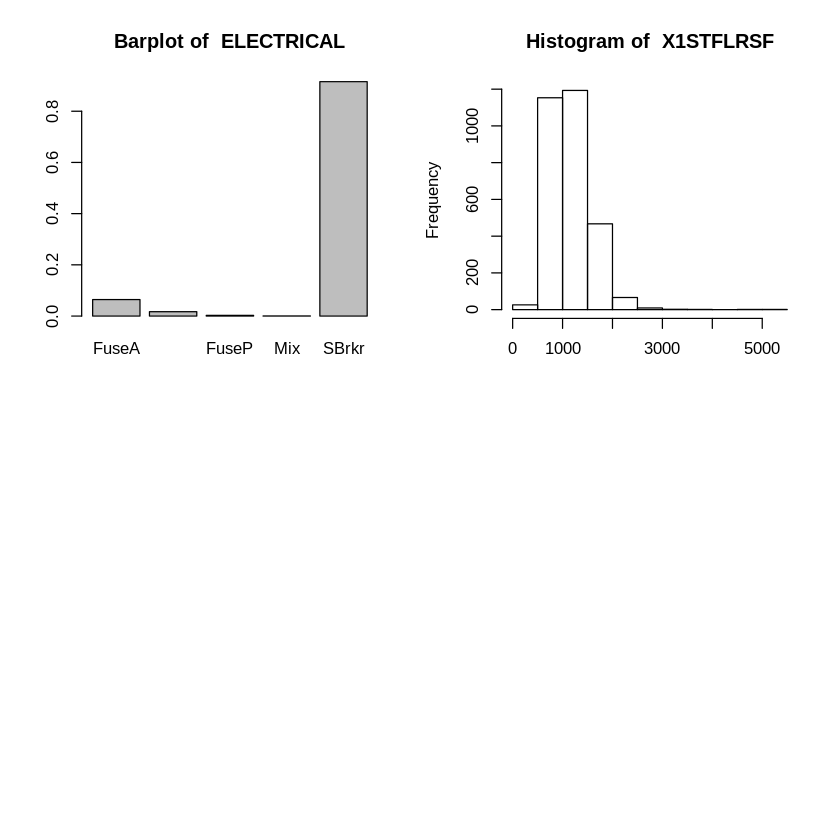

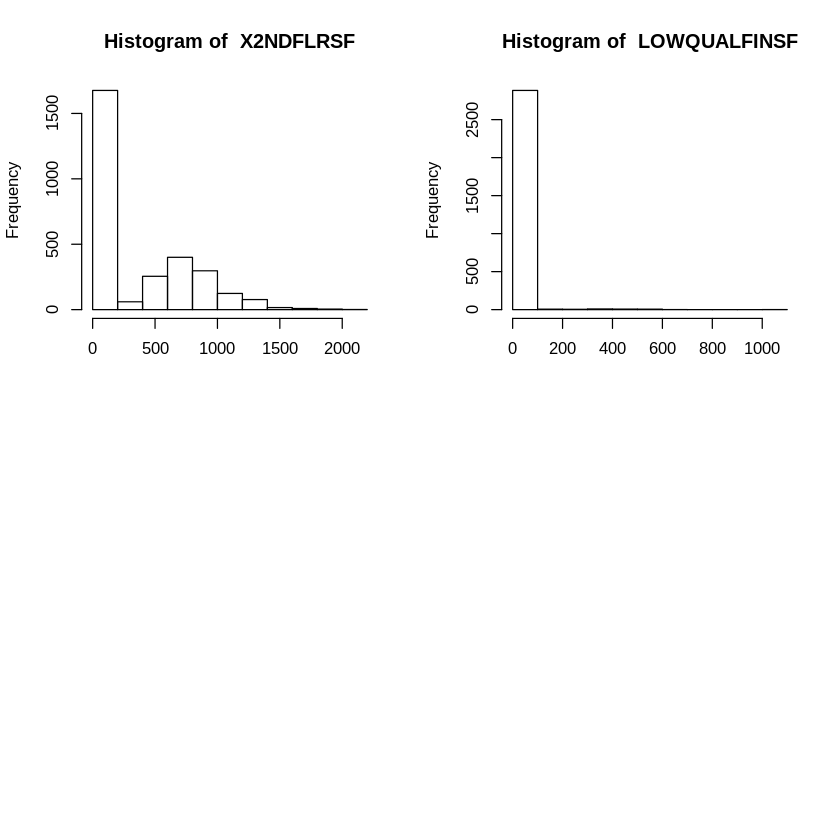

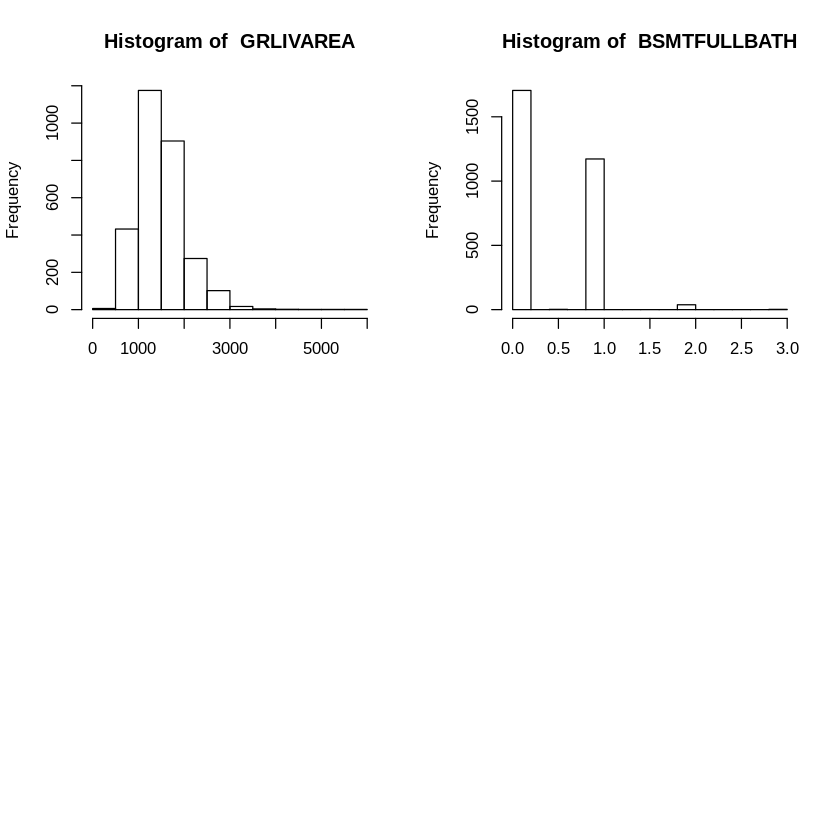

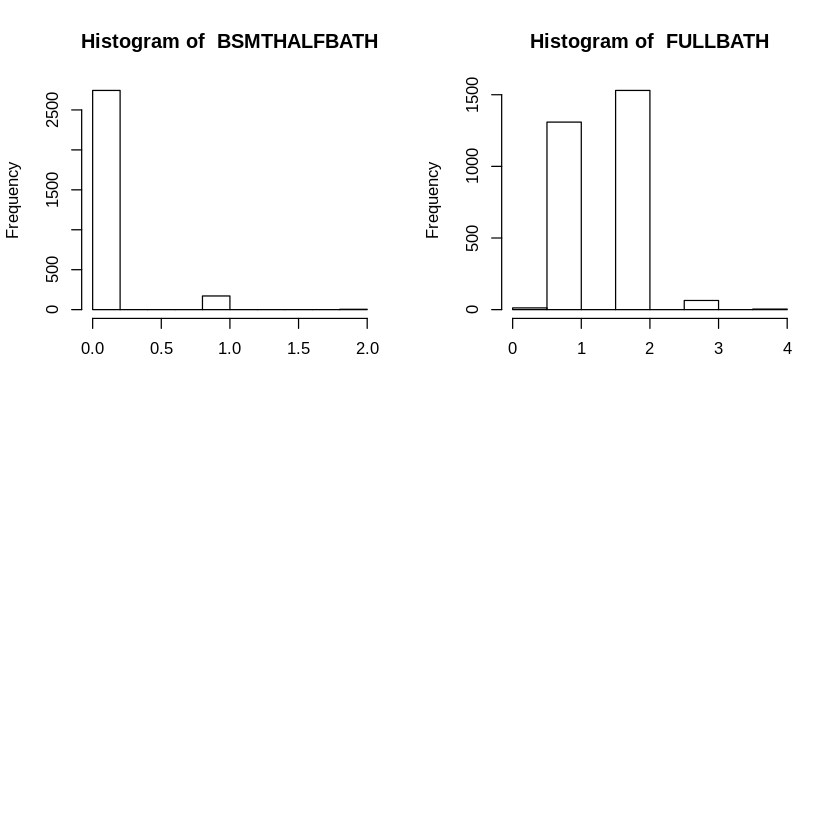

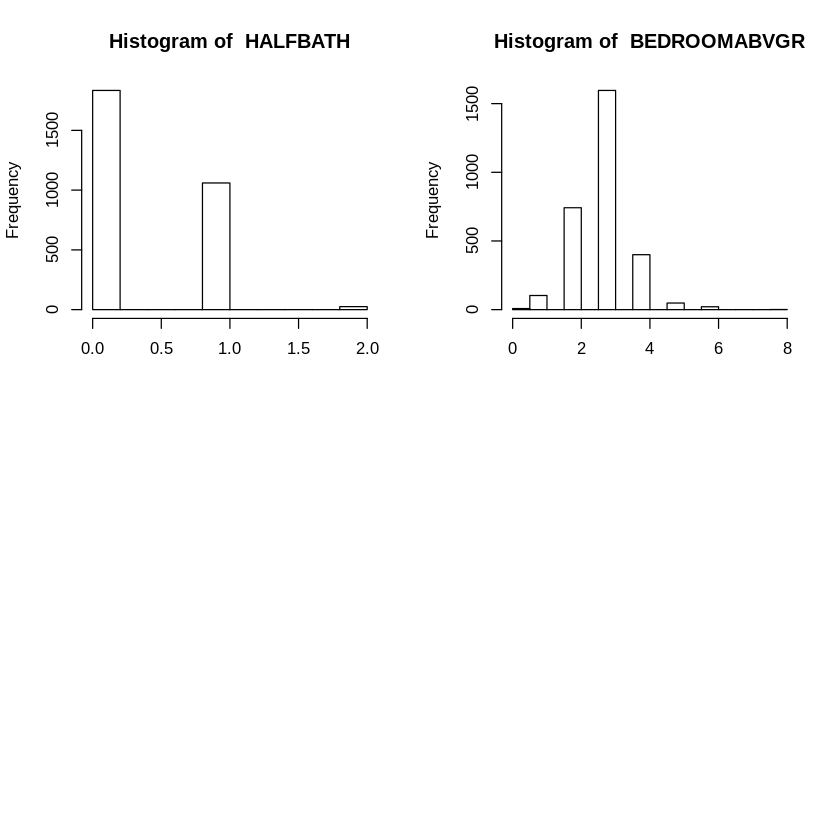

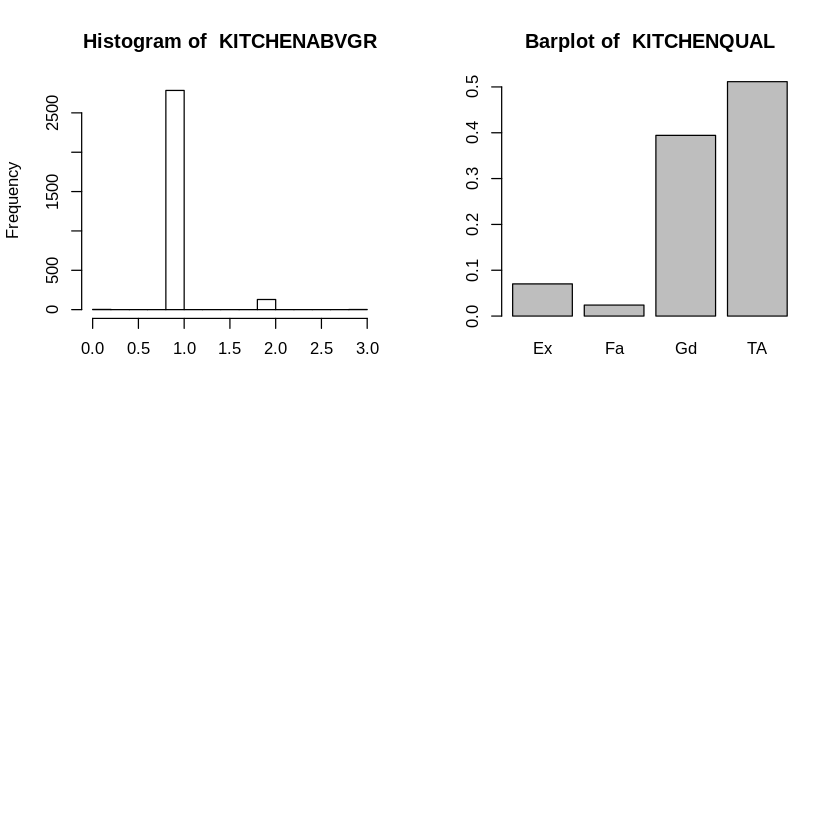

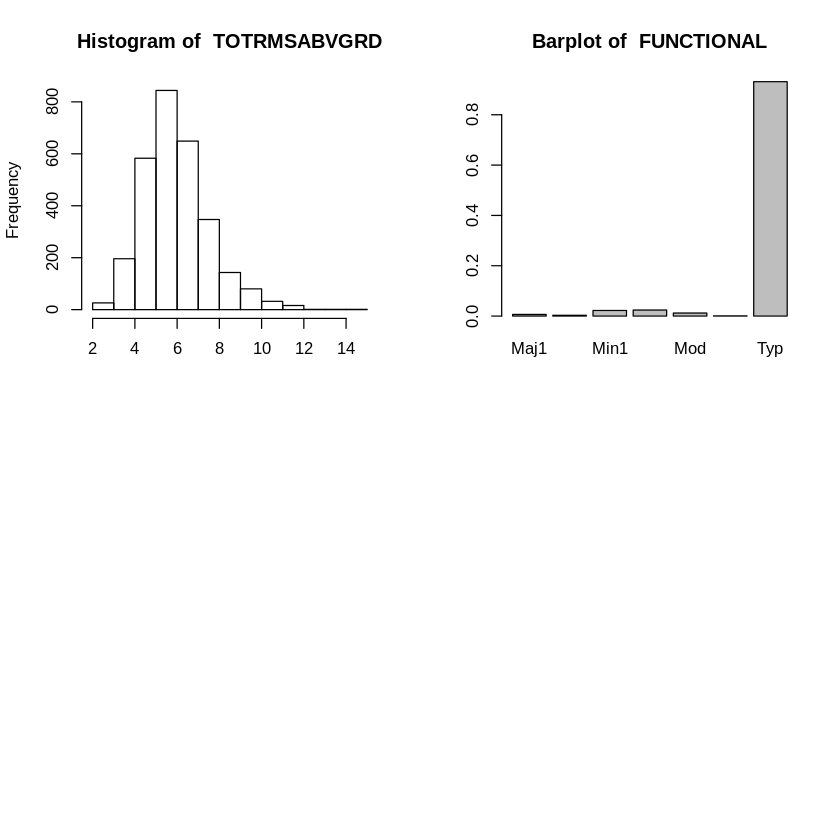

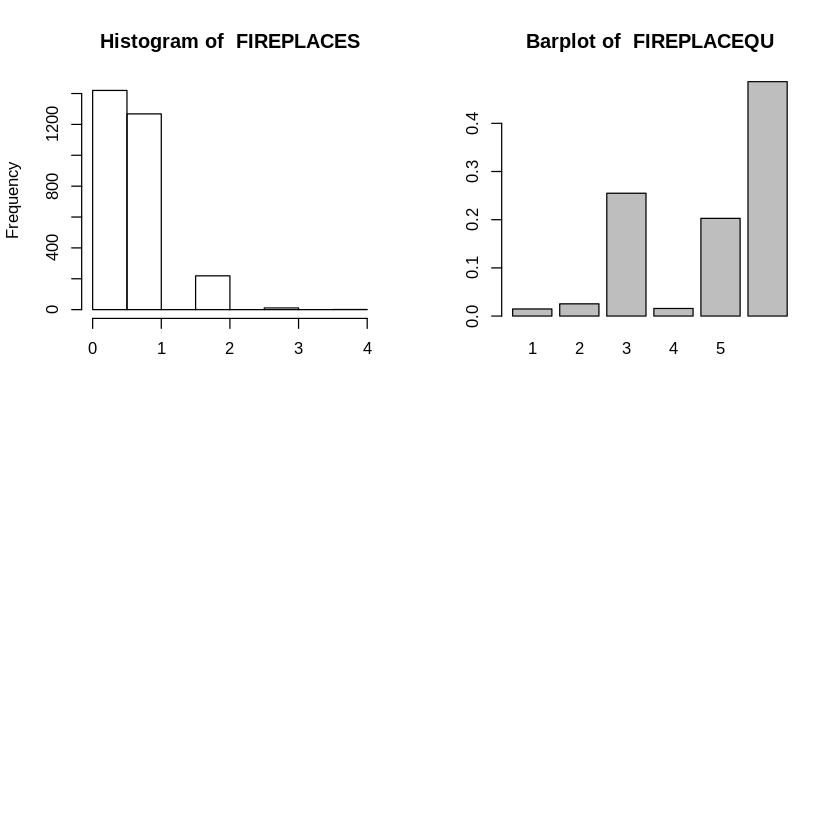

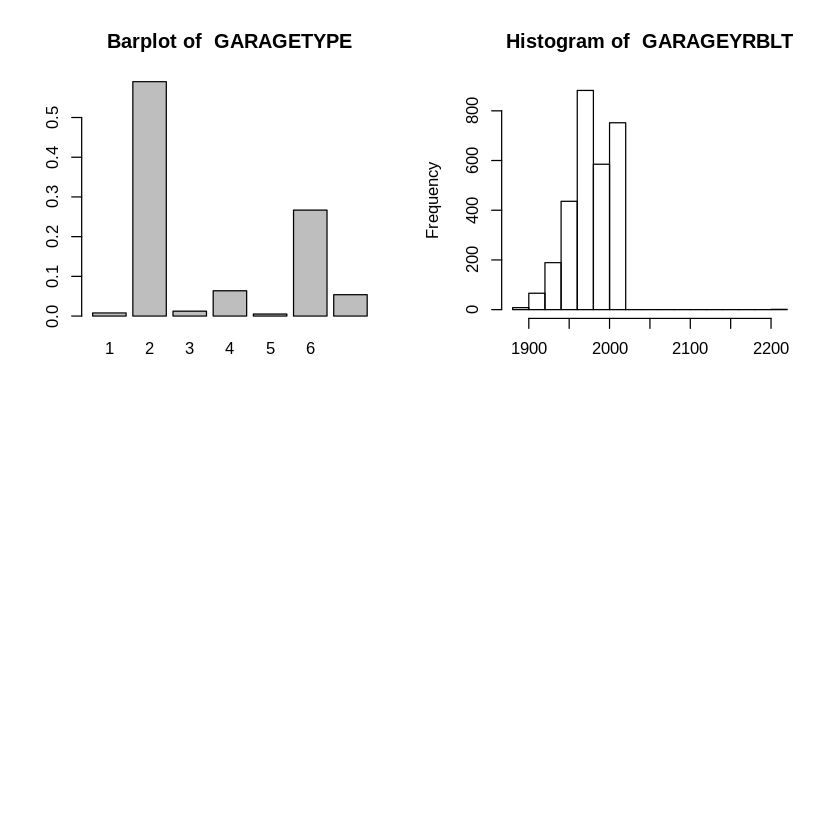

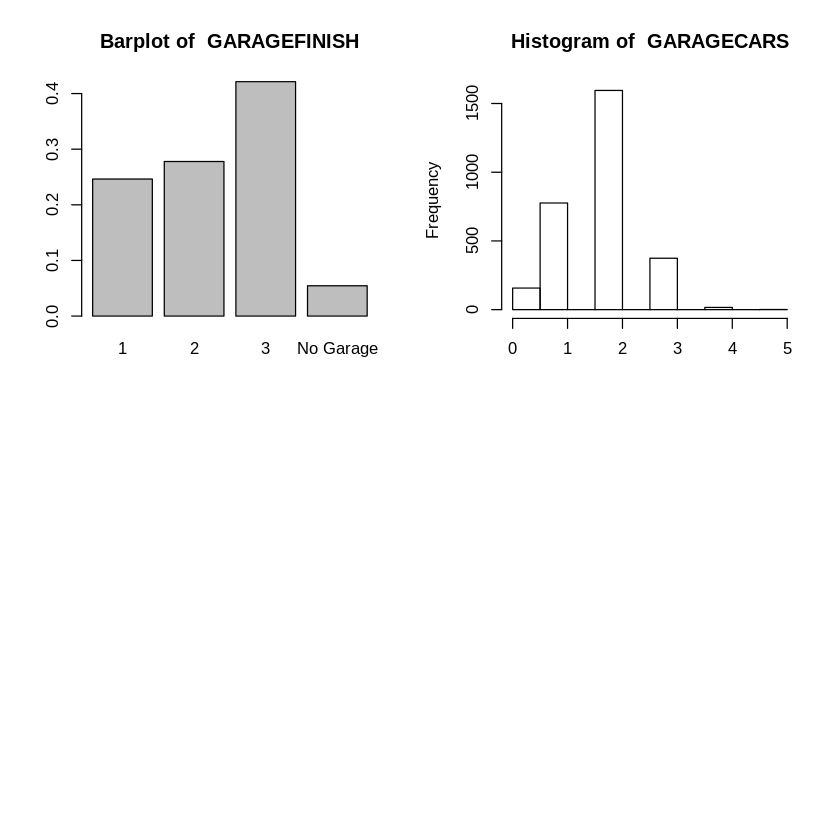

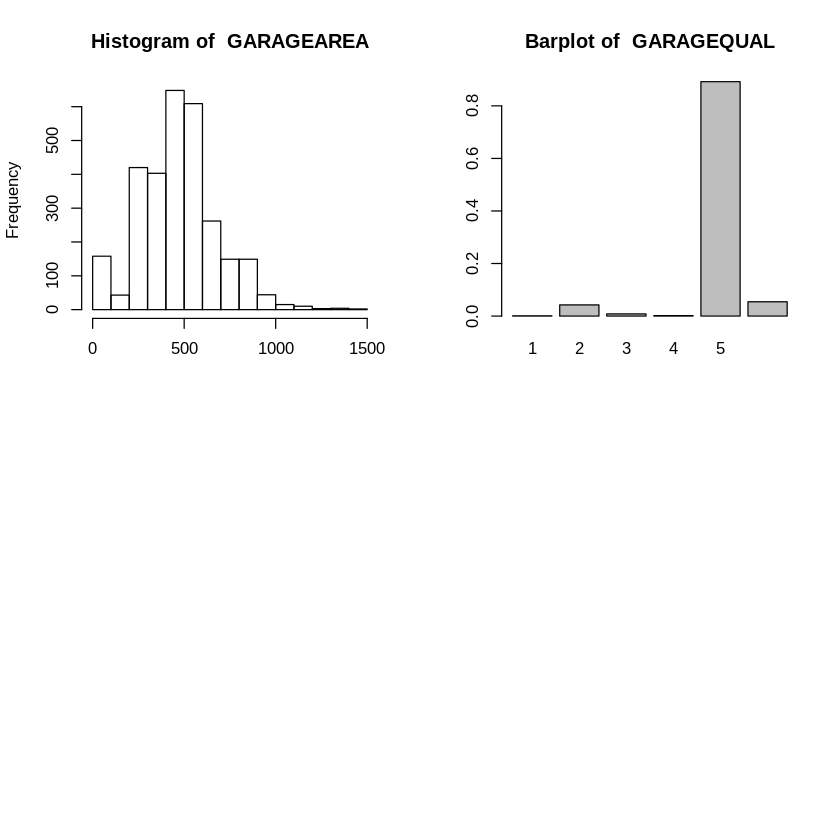

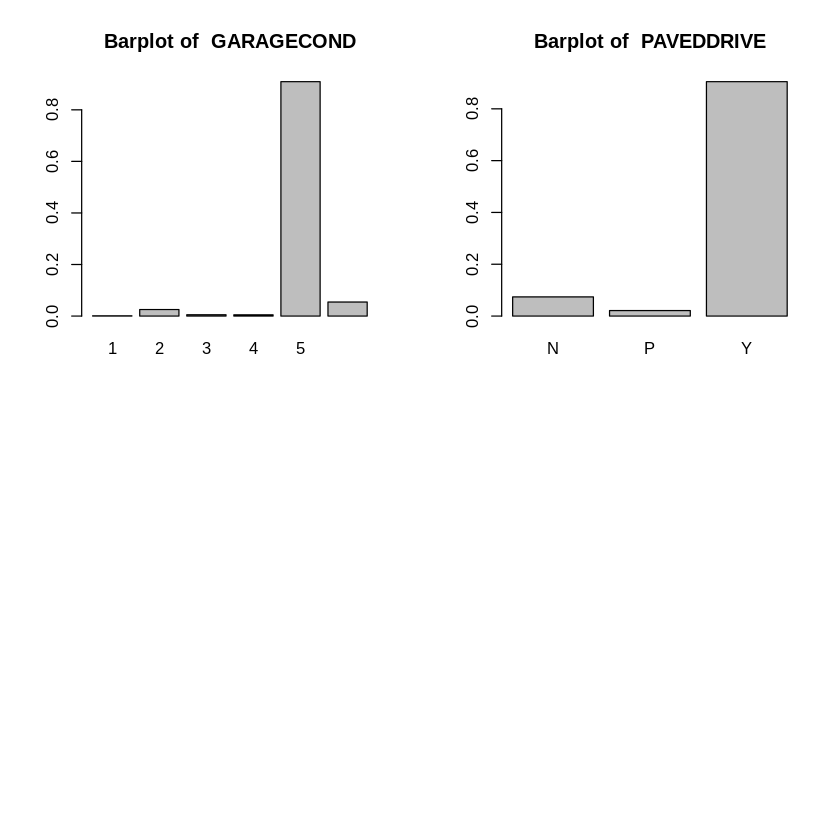

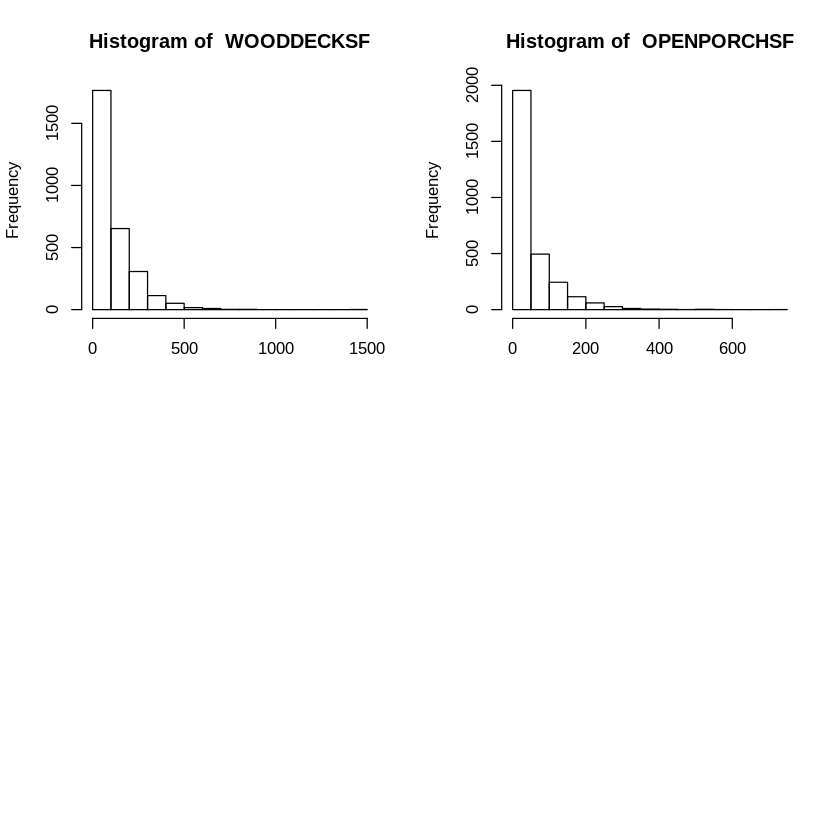

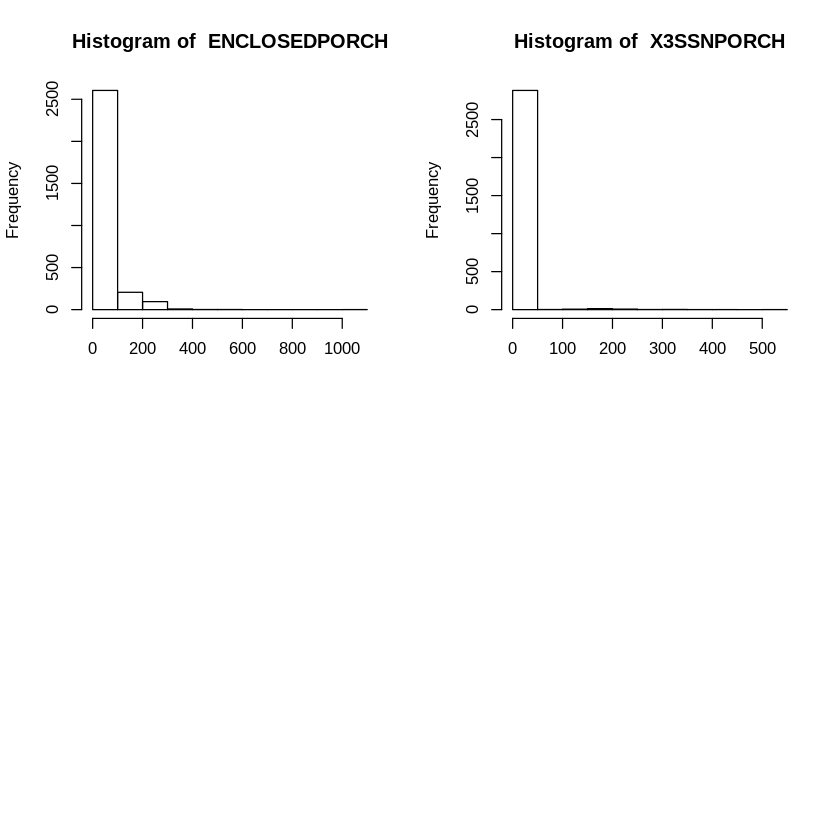

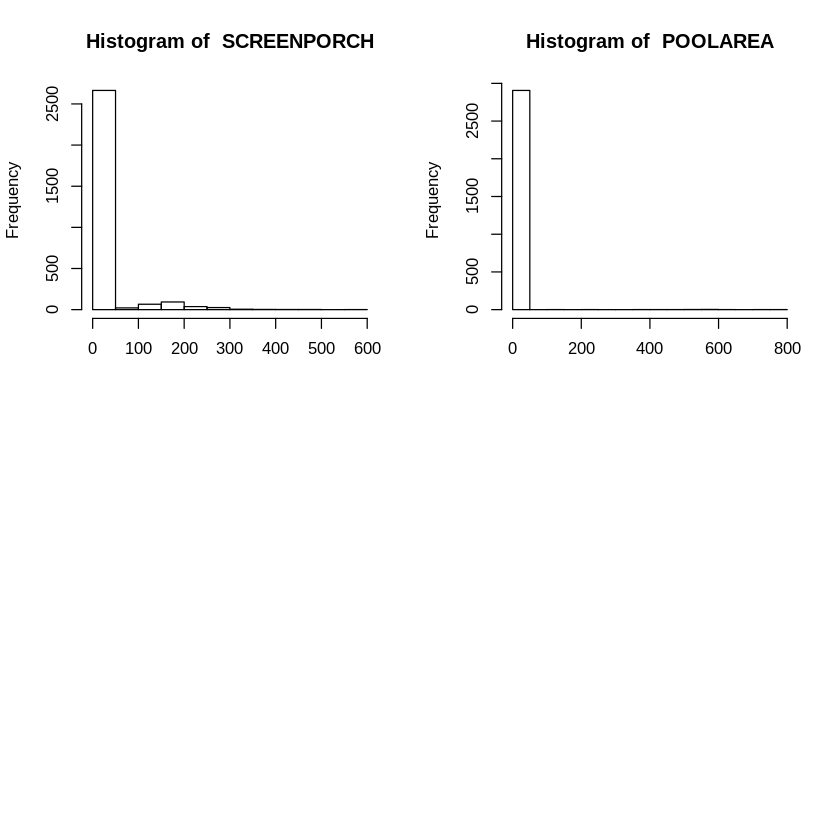

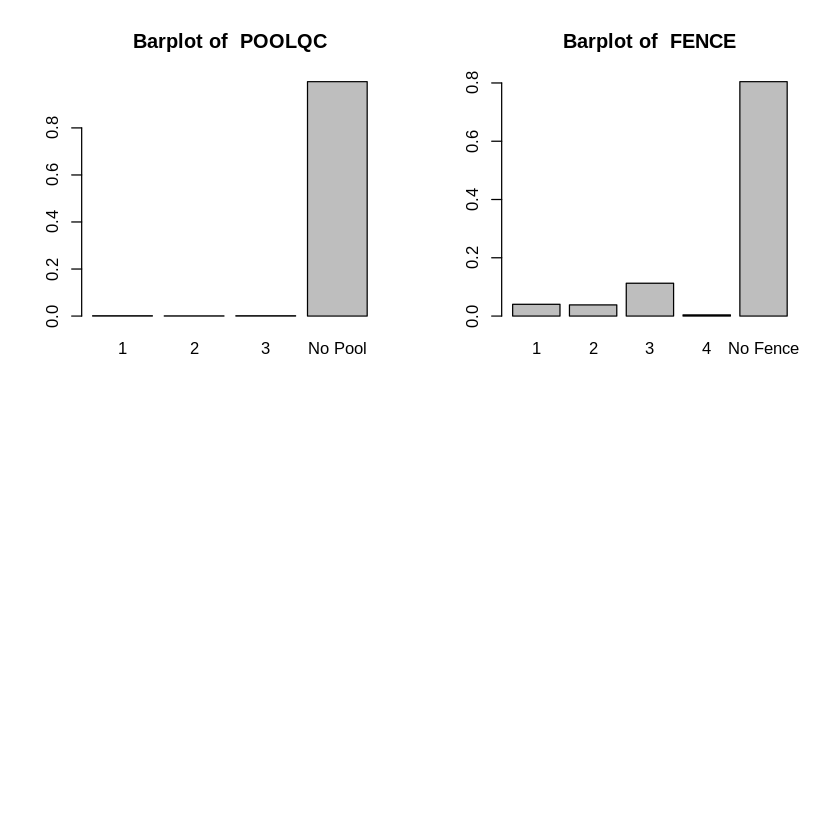

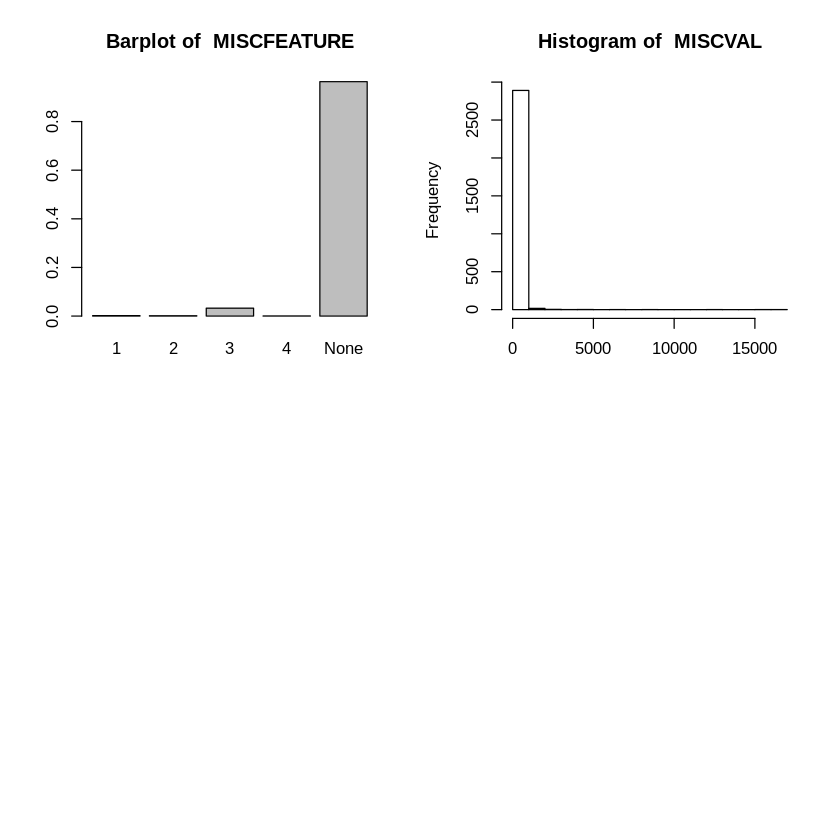

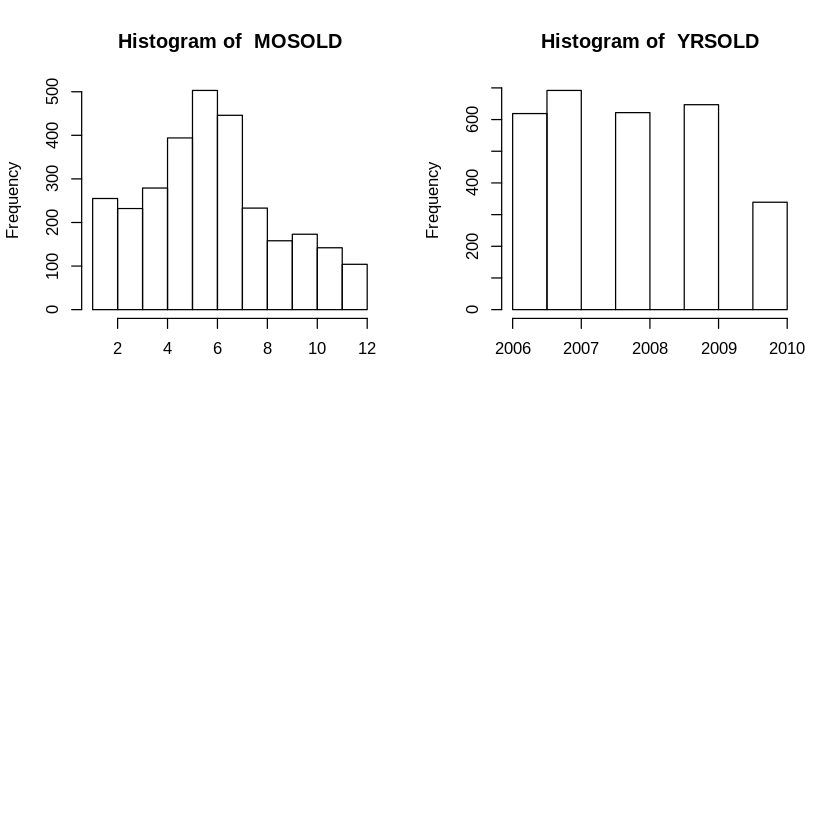

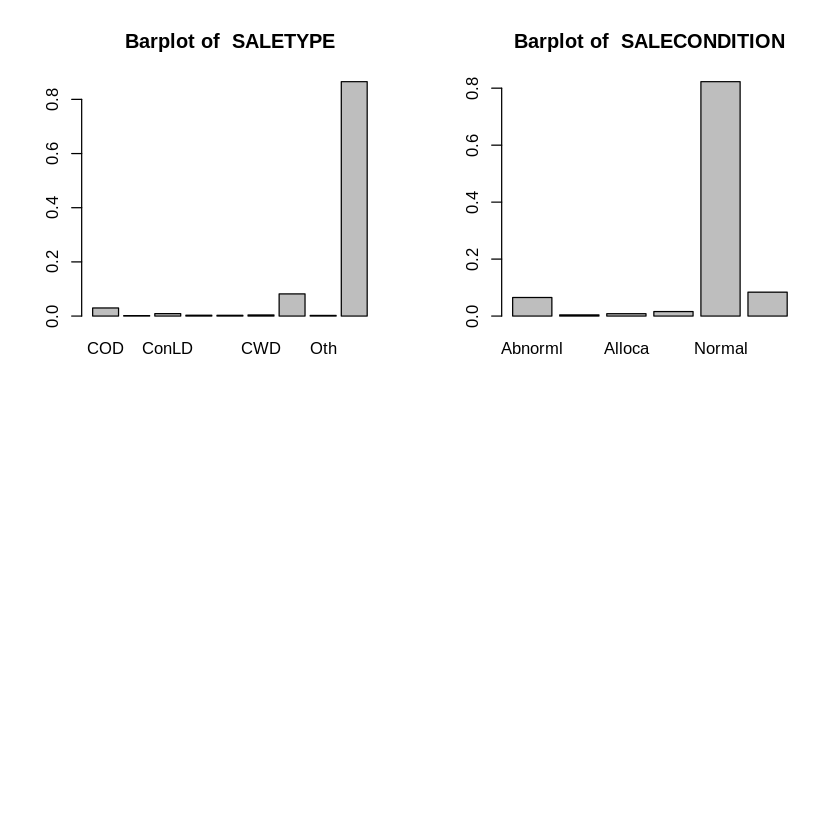

In [10]:
# Now we visulize each 
for (i in seq(1,ncol(al)-1,2)){
    par(mfrow=c(2, 2))
    desc(names(al[i]))
    desc(names(al[i+1]))
}

In [11]:
a <- data.frame(sapply(al, class))
names(a) <- c("class")
a

,class
Id,integer
MSSubClass,integer
MSZoning,factor
LotFrontage,numeric
LotArea,integer
Street,factor
Alley,character
LotShape,factor
LandContour,factor
Utilities,factor


In [12]:
a %>%
    group_by(class) %>% 
    tally()

class,n
character,15
factor,29
integer,26
numeric,11


In [19]:
train <- al[al$train_or_test == 'train',]
train <- train[ , -which(names(train) == 'train_or_test')]
train <- merge(train, train_target, by = 'Id')

test <- al[al$train_or_test == 'test',]
test <- test[ , -which(names(test) == 'train_or_test')]

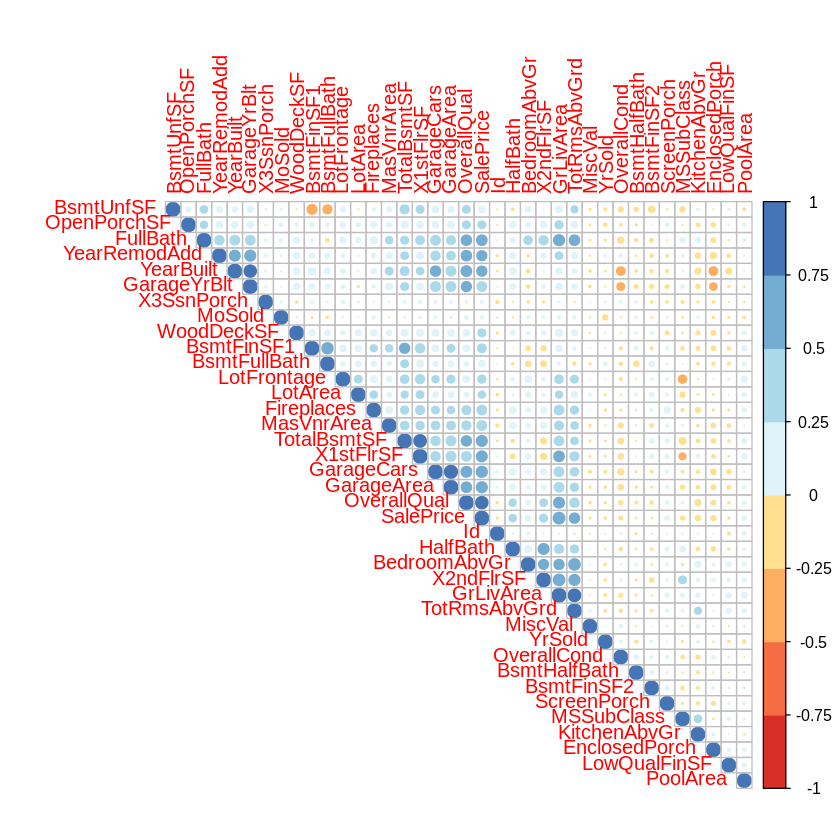

In [20]:
corrplot(cor(train %>% keep(is.numeric)), type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))

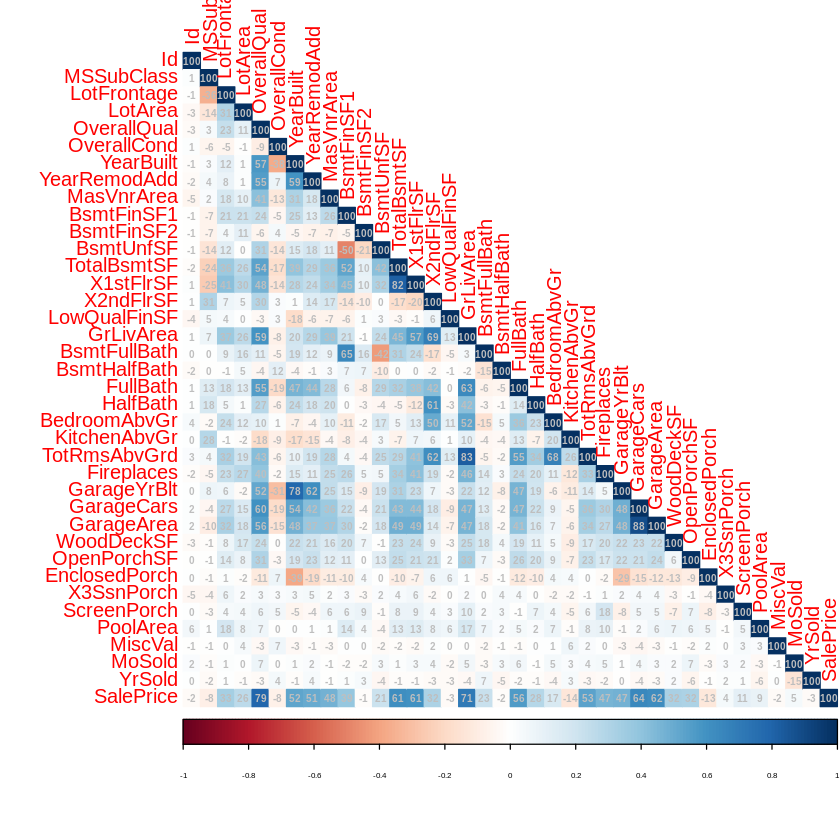

In [21]:
cex.before <- par("cex")
par(cex = 0.5)
corrplot(cor(train %>% keep(is.numeric)), insig = "blank", method = "color",
    addCoef.col="grey", type='lower',
    tl.cex = 1/par("cex"), addCoefasPercent = TRUE)
par(cex = cex.before)

In [22]:
# check if case to lower reduce number of unique values
for (i in names(train %>% keep(is.factor))){
    a = table(train[[i]])
    b = table(tolower(train[[i]]))
    if (!all(a==b)){
        print(i)
    }
    
}

In [24]:
lm1 <- lm(SalePrice ~ ., data=train)
names(which.min(summary(lm1)$coefficients[,4]))

[1] "RoofMatlWdShngl"

In [25]:
a = data.frame(summary(lm1)$coefficients)
a[order(a$Pr...t..),]

,Estimate,Std..Error,t.value,Pr...t..
RoofMatlWdShngl,6.302536e+05,5.365013e+04,11.747477,3.007024e-30
X2ndFlrSF,6.234664e+01,5.689444e+00,10.958303,1.047684e-26
RoofMatlCompShg,5.753007e+05,5.269143e+04,10.918297,1.565150e-26
RoofMatlMembran,6.706055e+05,6.255077e+04,10.720979,1.113893e-25
RoofMatlWdShake,5.673234e+05,5.503756e+04,10.307930,6.165993e-24
RoofMatlMetal,6.390603e+05,6.217448e+04,10.278500,8.167103e-24
RoofMatlTar&Grv,5.761991e+05,5.648257e+04,10.201363,1.700745e-23
RoofMatlRoll,5.620058e+05,5.828755e+04,9.641952,3.029569e-21
Condition2PosN,-2.389383e+05,2.758681e+04,-8.661321,1.471955e-17
X1stFlrSF,4.413243e+01,5.636406e+00,7.829889,1.062756e-14


In [26]:
# Automated variable selection
fit <- lm(formula = SalePrice ~ ., data = train) 
automate_variable_selection <- stepAIC(fit, direction="both")

Start:  AIC=29498.94
SalePrice ~ Id + MSSubClass + MSZoning + LotFrontage + LotArea + 
    Street + Alley + LotShape + LandContour + Utilities + LotConfig + 
    LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + 
    HouseStyle + OverallQual + OverallCond + YearBuilt + YearRemodAdd + 
    RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + 
    MasVnrArea + ExterQual + ExterCond + Foundation + BsmtQual + 
    BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinSF1 + BsmtFinType2 + 
    BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + Heating + HeatingQC + 
    CentralAir + Electrical + X1stFlrSF + X2ndFlrSF + LowQualFinSF + 
    GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + 
    BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + 
    Functional + Fireplaces + FireplaceQu + GarageType + GarageYrBlt + 
    GarageFinish + GarageCars + GarageArea + GarageQual + GarageCond + 
    PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + X3SsnPorch + 
    

In [27]:
only_significat_vars <- names(automate_variable_selection$contrasts)

In [28]:
final_df <- train[only_significat_vars]
dim(final_df)

[1] 1460   25

In [29]:
lm3 <- lm(SalePrice ~ ., data= cbind(final_df, train["SalePrice"]))
summary(lm3)


Call:
lm(formula = SalePrice ~ ., data = cbind(final_df, train["SalePrice"]))

Residuals:
    Min      1Q  Median      3Q     Max 
-139665  -19466   -1540   16068  217491 

Coefficients: (2 not defined because of singularities)
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              238502.32   77954.33   3.060 0.002261 ** 
MSZoningFV                51784.88   17267.65   2.999 0.002759 ** 
MSZoningRH                35829.47   17329.46   2.068 0.038876 *  
MSZoningRL                36510.27   14696.67   2.484 0.013105 *  
MSZoningRM                32986.55   13679.28   2.411 0.016025 *  
StreetPave                10808.18   16836.89   0.642 0.521027    
LandContourHLS             3049.61    7468.93   0.408 0.683115    
LandContourLow            -9872.35    8976.54  -1.100 0.271621    
LandContourLvl             5280.80    5326.54   0.991 0.321665    
UtilitiesNoSeWa          -44123.63   36480.02  -1.210 0.226675    
LotConfigCulDSac          12404.07

In [41]:
pred <- predict(lm3, newdata = test)

Warning message in predict.lm(lm3, newdata = test):
“prediction from a rank-deficient fit may be misleading”

In [39]:
write.csv(cbind('Id'=test$Id, 'SalePrice'=pred), "submission.csv", row.names=FALSE)

In [38]:
system("gnome-terminal", intern=T)

character(0)